In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Loading the original Image


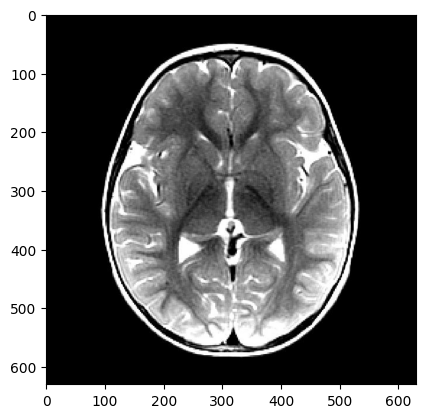

In [3]:
# from sklearn import svm
#Loading the dataset
data_dir = 'archive11\\dataset'
images = []
labels = []
# Select the first image file in the directory
patient = os.listdir(data_dir)[0]
image_file = os.listdir(os.path.join(data_dir, patient))[0]
image_path = os.path.join(data_dir, patient, image_file)
# Load the original image
print("Loading the original Image")
image_1 = plt.imread(image_path)
plt.imshow(image_1)
plt.show()

In [4]:
for patient in os.listdir(data_dir):
    for image_file in os.listdir(os.path.join(data_dir, patient)):
        image_path = os.path.join(data_dir, patient, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            images.append(image)
            labels.append(0 if 'no' in image_file else 1)

In [ ]:
# Display the image
plt.imshow(images[1500], cmap='gray')
plt.show()

In [5]:
image_size = (256, 256)
resized_images = [cv2.resize(image, image_size) for image in images]
normalized_images = [(image - np.min(image)) / (np.max(image) - np.min(image)) for image in resized_images]
print("Resized Images:", resized_images[:10])

Resized Images: [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       ...,
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=uint8), array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.3, random_state=42)

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.ravel()
# initialize a variable to limit number of tumor images to be displayed
num = 0
for i in range(len(X_test)):
    # if current image has a tumor
    if y_test[i] == 1:
        # display it next
        axes[num].imshow(X_test[i], cmap='gray')
        axes[num].axis('off')
        axes[num].set_title('Tumor')
        # increment the number of tumor images displayed
        num += 1
        # stop if all the tumor images are displayed
        if num == 20:
            break

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.ravel()
num = 0
for i in range(len(X_test)):
    # if current image does not have tumor
    if y_test[i] == 0:
        axes[num].imshow(X_test[i], cmap='gray')
        axes[num].axis('off')
        axes[num].set_title('Non-Tumor')
        num += 1
        if num == 20:
            break
while num < 20:
    axes[num].axis('off')
    num += 1
plt.show()

In [7]:
# Define the CNN model architecture using tf keras
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy', tf.keras.metrics.Recall()])
# Convert and expand the training and test data
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.constant(X_test, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)
# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))
# Accuracy and recall
loss, accuracy, recall = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Recall:", recall)
cnn_acc = accuracy
cnn_rec = recall

Epoch 1/2
66/66 [==============================] - 129s 2s/step - loss: 0.5742 - accuracy: 0.8005 - recall: 0.8511 - val_loss: 0.2442 - val_accuracy: 0.8878 - val_recall: 0.8109
Epoch 2/2
29/29 [==============================] - 9s 321ms/step - loss: 0.0812 - accuracy: 0.9700 - recall: 0.9727
Accuracy: 0.9700000286102295
Recall: 0.9726651310920715
